In [11]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [12]:
def show_with_plt(color_img, title, pos):

    #convert BGR to RGB 
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

plt.figure(figsize=(12, 6))
plt.suptitle("Sharpening Images", fontsize=14, fontweight="bold")

Text(0.5, 0.98, 'Sharpening Images')

<Figure size 864x432 with 0 Axes>

In [13]:
def unsharp_filter(img):

    """The unsharp filter enhances edges subtacting the smoothed image 
    from the original image. 
    """
    smoothed = cv2.GaussianBlur(img, (9,9), 10)
    return cv2.addWeighted(img, 1.5, smoothed, -0.5, 0)

In [14]:
image = cv2.imread("images/cat-face.png")

##### Creating 4 different Kernels

In [15]:
kernel_sharpen_1 = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

kernel_sharpen_2 = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])

kernel_sharpen_3 = np.array([[1, 1, 1],
                             [1, -7, 1],
                             [1, 1, 1]])

kernel_sharpen_4 = np.array([[-1, -1, -1, -1, -1],
                             [-1, 2, 2, 2, -1],
                             [-1, 2, 8, 2, -1],
                             [-1, 2, 2, 2, -1],
                             [-1, -1, -1, -1, -1, ]]) / 8.0

In [16]:
#Applying all the KERNEL_SHARPEN created above

sharp_image_1 = cv2.filter2D(image, -1, kernel_sharpen_1)
sharp_image_2 = cv2.filter2D(image, -1, kernel_sharpen_2)
sharp_image_3 = cv2.filter2D(image, -1, kernel_sharpen_3)
sharp_image_4 = cv2.filter2D(image, -1, kernel_sharpen_4)

###### Applying the UNSHARPEN filter

In [17]:
sharp_image_5 = unsharp_filter(image)

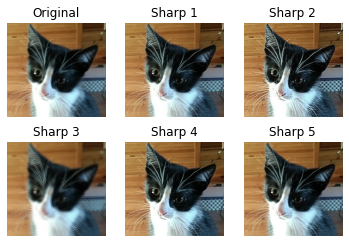

In [18]:
show_with_plt(image, "Original", 1)
show_with_plt(sharp_image_1, "Sharp 1", 2)
show_with_plt(sharp_image_2, "Sharp 2", 3)
show_with_plt(sharp_image_3, "Sharp 3", 4)
show_with_plt(sharp_image_4, "Sharp 4", 5)
show_with_plt(sharp_image_5, "Sharp 5", 6)

plt.show()
